<a href="https://colab.research.google.com/github/qwdfasgtfd/python-code/blob/main/cracking_the_market_code_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install tensorflow
!pip install mplfinance
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)


Saving GOOGL (1).csv to GOOGL (1).csv


In [ ]:
print("Initial Missing Values:\n", data.isnull().sum())
data = data[['Date', 'Close']].dropna()  # Ensure only necessary columns and no NaNs
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)


Initial Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
close_data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0013 - val_loss: 2.2803e-04
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.4604e-05 - val_loss: 1.7487e-04
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2838e-05 - val_loss: 1.4696e-04
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7327e-05 - val_loss: 1.1308e-04
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9415e-05 - val_loss: 1.3667e-04


In [ ]:
X_test, y_test = [], []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
mse = mean_squared_error(real_stock_price, predictions)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 12333.7462


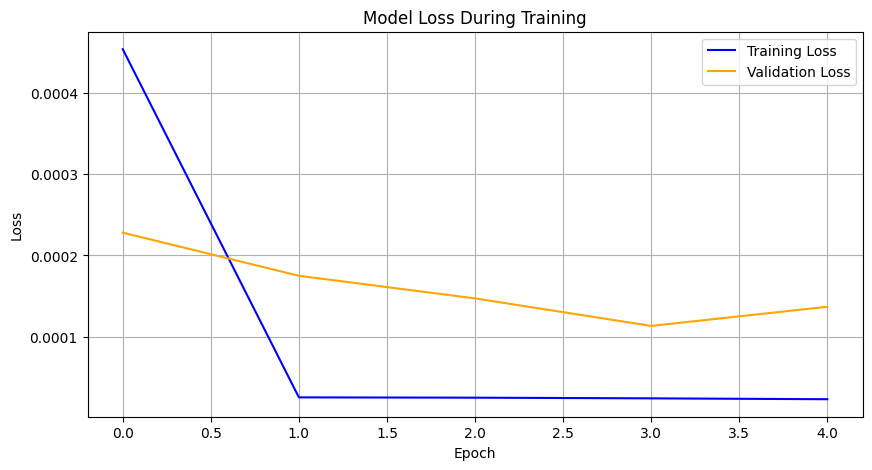

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


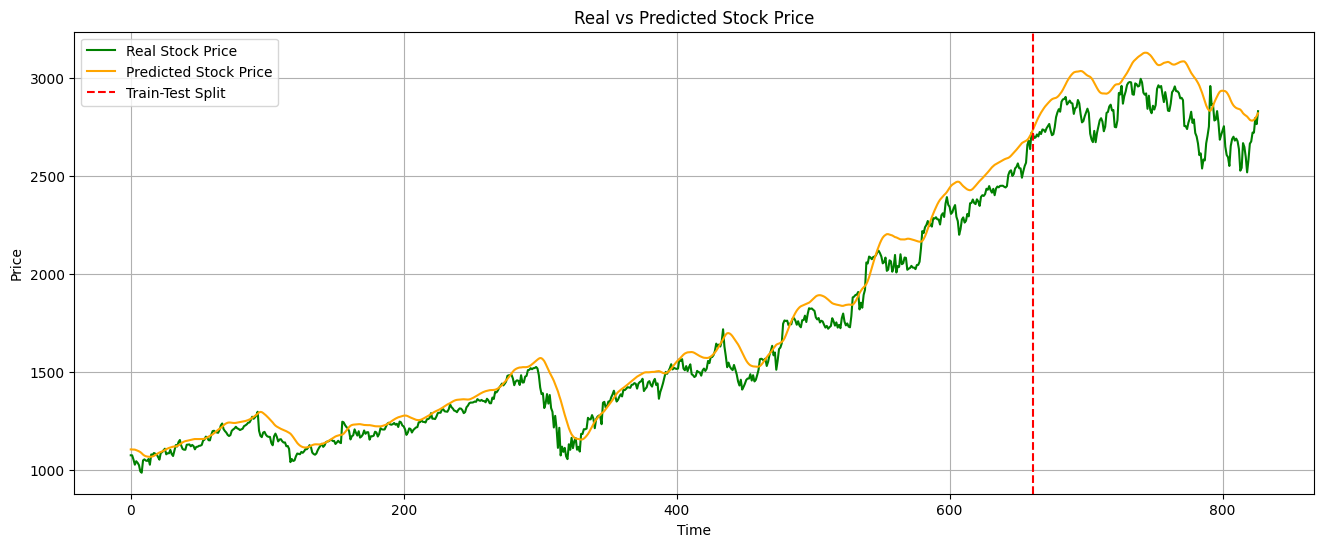

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(real_stock_price, label='Real Stock Price', color='green')
plt.plot(predictions, label='Predicted Stock Price', color='orange')
plt.axvline(x=int(len(real_stock_price)*0.8), color='red', linestyle='--', label='Train-Test Split')
plt.title('Real vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


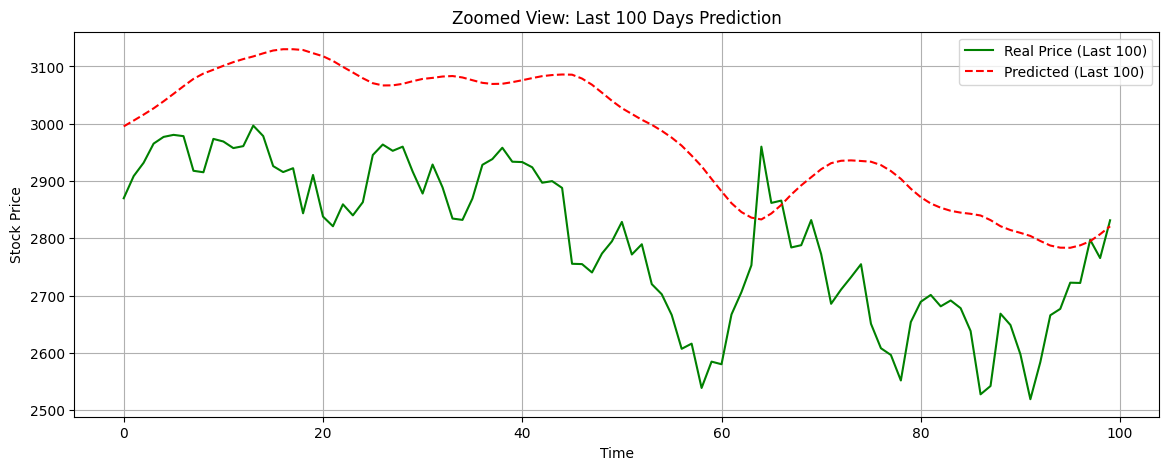

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(real_stock_price[-100:], color='green', label='Real Price (Last 100)')
plt.plot(predictions[-100:], color='red', linestyle='--', label='Predicted (Last 100)')
plt.title('Zoomed View: Last 100 Days Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
